<a href="https://colab.research.google.com/github/MehrDataPythonist/daily-dev-/blob/main/Untitled156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# پروژه تشخیص چهره با استفاده از دیتاست LFW

## سلول 1: نصب و وارد کردن کتابخانه‌های مورد نیاز

In [1]:
!pip install gdown opencv-python numpy pandas matplotlib

import gdown
import cv2
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import tarfile

print("کتابخانه‌ها با موفقیت نصب و وارد شدند.")

کتابخانه‌ها با موفقیت نصب و وارد شدند.


## سلول 2: دانلود و استخراج دیتاست LFW

In [2]:
# دانلود دیتاست از Google Drive
url = 'https://drive.google.com/uc?id=1tje4pm45KaIEnzM99GTmeNxEmZUrM65y'
output = 'lfw.tgz'
gdown.download(url, output, quiet=False)

# استخراج فایل
with tarfile.open(output, "r:gz") as tar:
    tar.extractall()

print("دیتاست LFW با موفقیت دانلود و استخراج شد.")

Downloading...
From (original): https://drive.google.com/uc?id=1tje4pm45KaIEnzM99GTmeNxEmZUrM65y
From (redirected): https://drive.google.com/uc?id=1tje4pm45KaIEnzM99GTmeNxEmZUrM65y&confirm=t&uuid=871a93d0-529f-4432-aa92-09bebf43c5b0
To: /content/lfw.tgz
100%|██████████| 181M/181M [00:06<00:00, 26.8MB/s]


دیتاست LFW با موفقیت دانلود و استخراج شد.


## سلول 3: تعریف توابع مورد نیاز


In [3]:
def tashkhis_chehre(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

def pardazesh_tasvir(image_path):
    image = cv2.imread(image_path)
    faces = tashkhis_chehre(image)

    natayej = []
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        natayej.append({"نام": "چهره شناسایی شده", "زمان": datetime.now()})

    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return pd.DataFrame(natayej)

print("توابع مورد نیاز با موفقیت تعریف شدند.")

توابع مورد نیاز با موفقیت تعریف شدند.


## سلول 4: پردازش تصاویر نمونه از دیتاست LFW

پردازش تصویر: lfw/Bernice_Wong/Bernice_Wong_0001.jpg


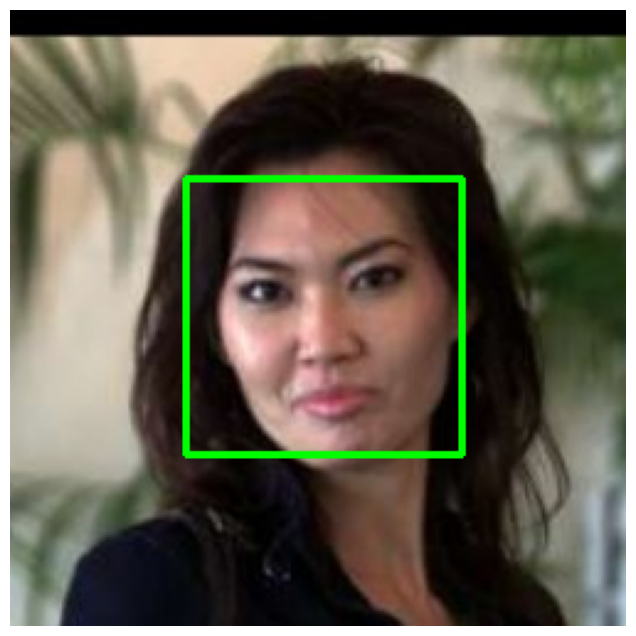

                نام                       زمان
0  چهره شناسایی شده 2024-07-05 16:08:02.132272


پردازش تصویر: lfw/Helen_Darling/Helen_Darling_0001.jpg


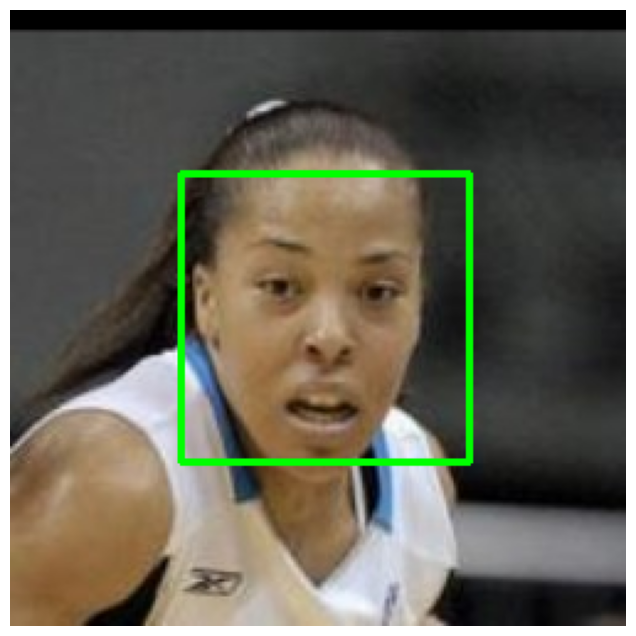

                نام                       زمان
0  چهره شناسایی شده 2024-07-05 16:08:02.568396


پردازش تصویر: lfw/Lim_Dong-won/Lim_Dong-won_0001.jpg


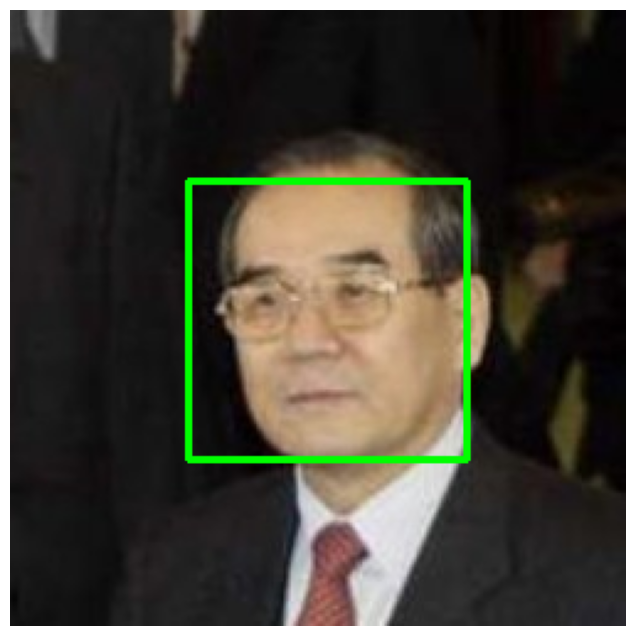

                نام                       زمان
0  چهره شناسایی شده 2024-07-05 16:08:03.006773


پردازش تصویر: lfw/Nicolas_Cage/Nicolas_Cage_0002.jpg


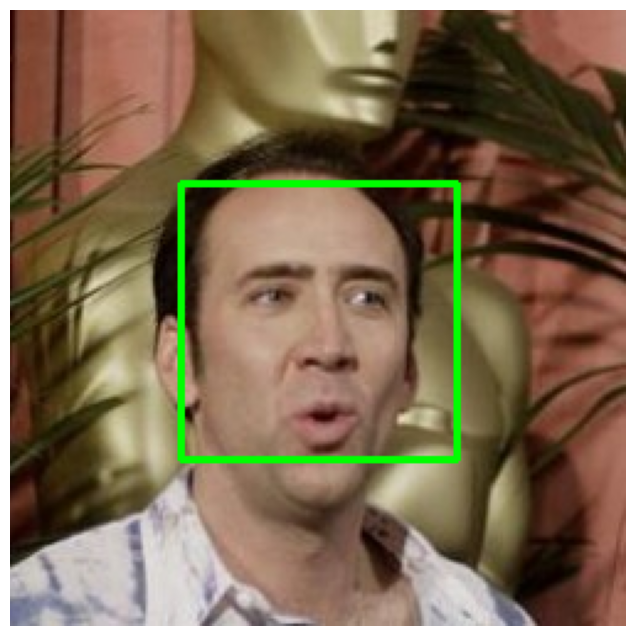

                نام                       زمان
0  چهره شناسایی شده 2024-07-05 16:08:03.421423


پردازش تصویر: lfw/Paula_Radcliffe/Paula_Radcliffe_0002.jpg


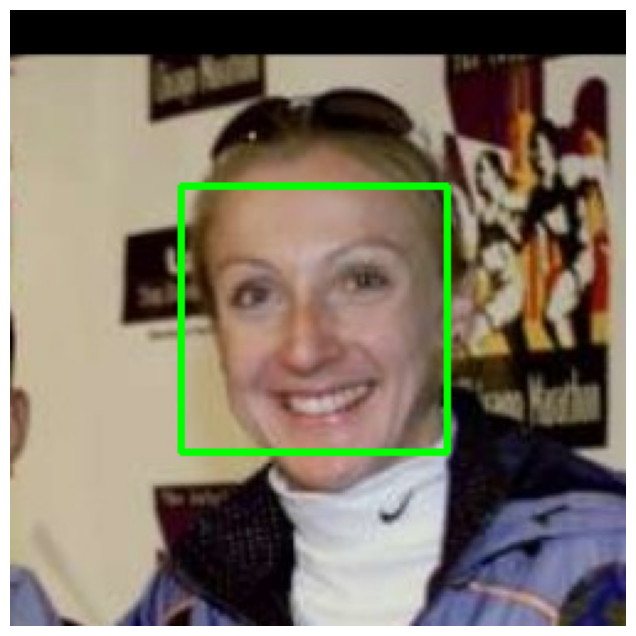

                نام                       زمان
0  چهره شناسایی شده 2024-07-05 16:08:03.998997


پردازش تصاویر نمونه به پایان رسید.


In [4]:
lfw_path = 'lfw'
sample_images = [os.path.join(lfw_path, folder, file)
                 for folder in os.listdir(lfw_path)[:5]
                 for file in os.listdir(os.path.join(lfw_path, folder))[:1]]

for image_path in sample_images:
    print(f"پردازش تصویر: {image_path}")
    natayej_df = pardazesh_tasvir(image_path)
    print(natayej_df)
    print("\n")

print("پردازش تصاویر نمونه به پایان رسید.")

## سلول 5: تحلیل و نمایش نتایج کلی

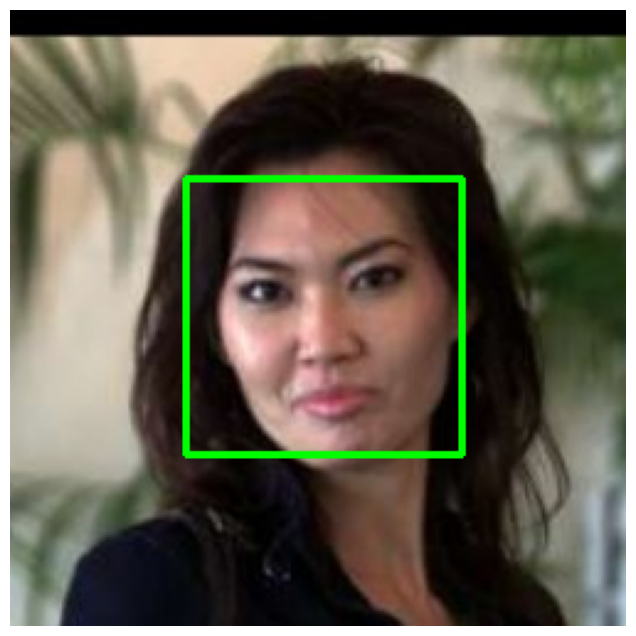

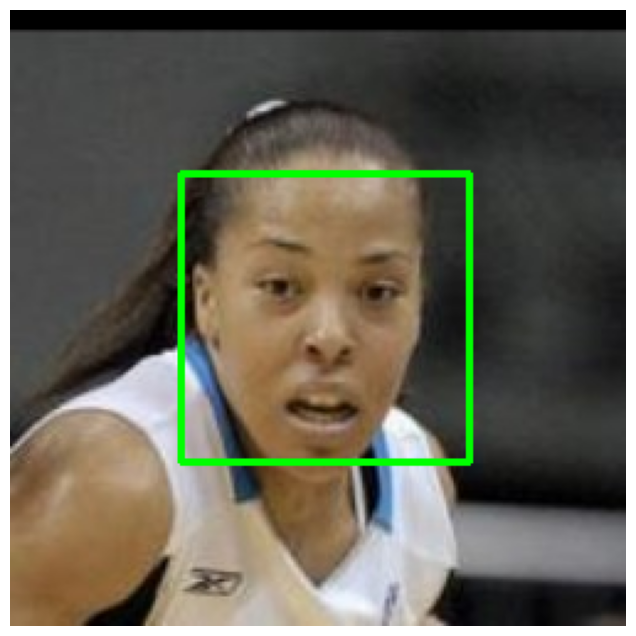

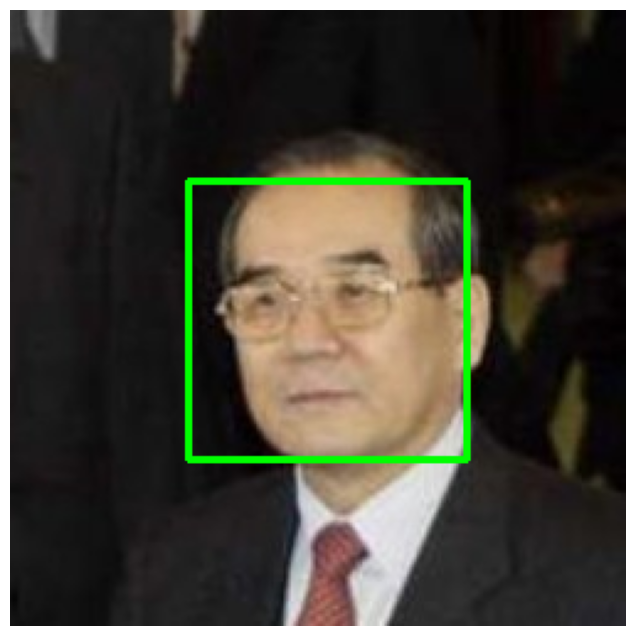

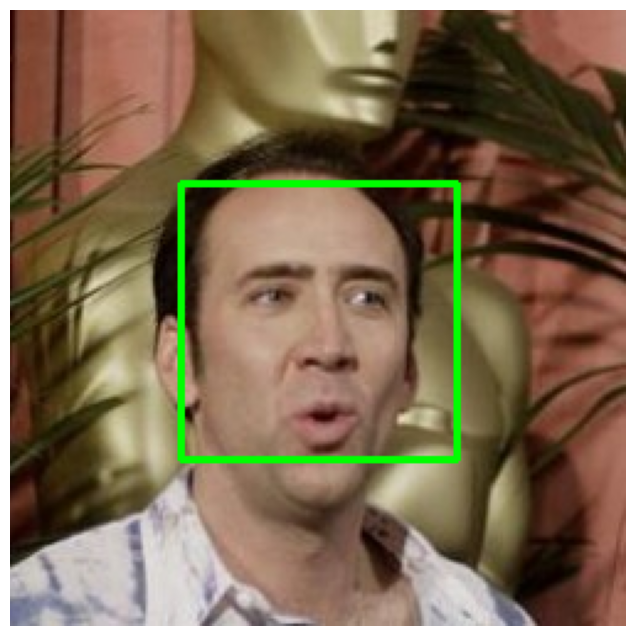

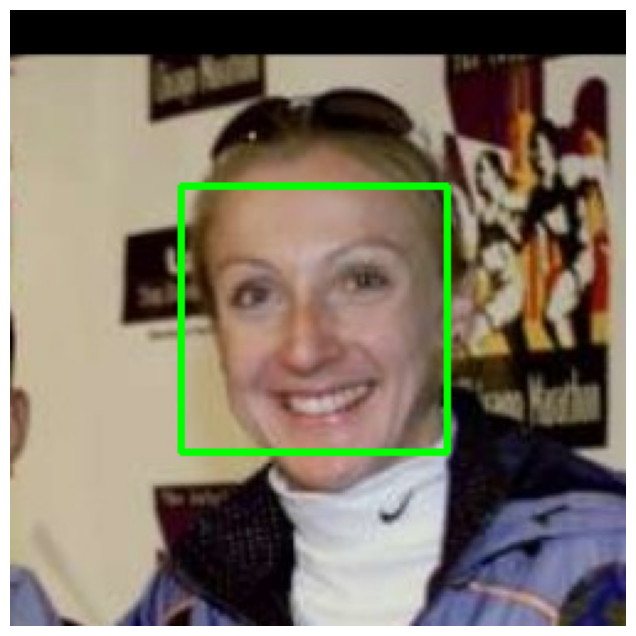

Tedade kol chehrehaye shenasayi shode: 5
Tedade tasavir pardazesh shode: 5
Miangine tedade chehre dar har tasvir: 1.00


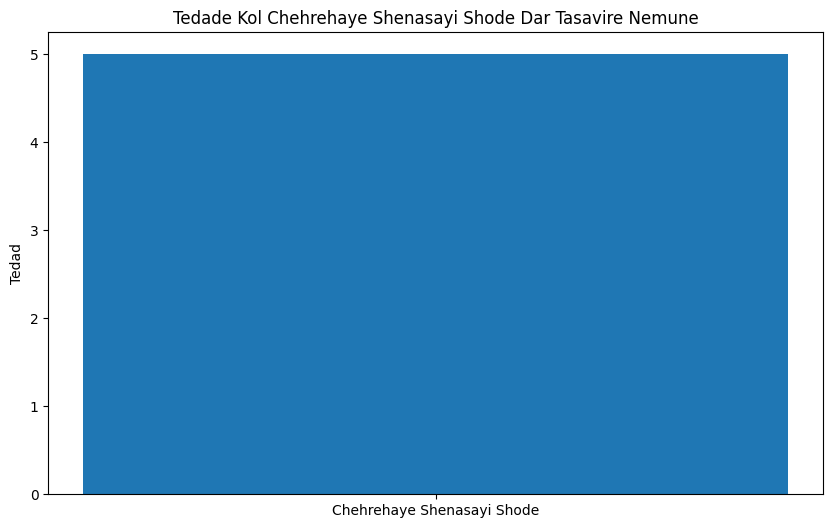

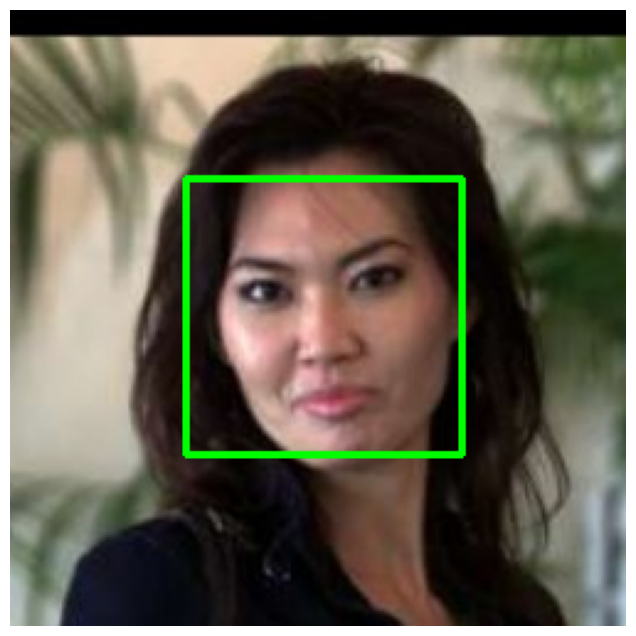

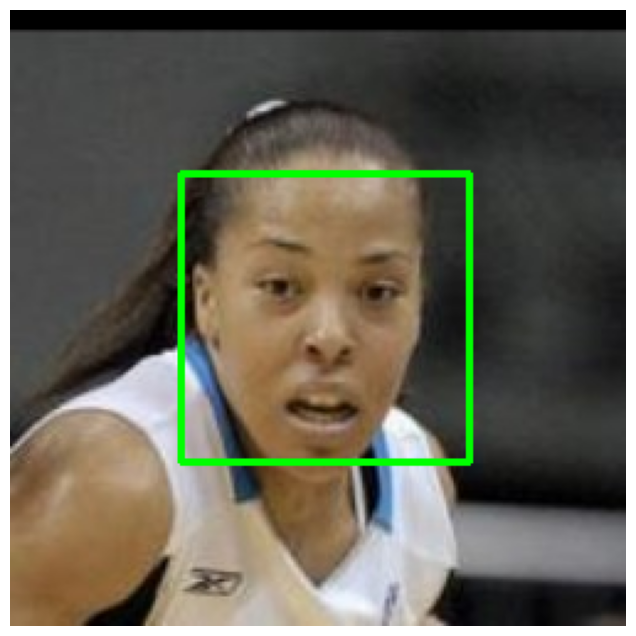

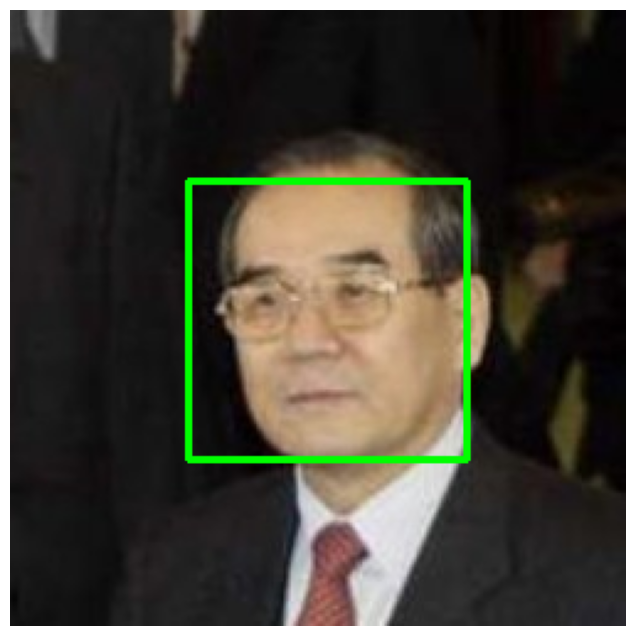

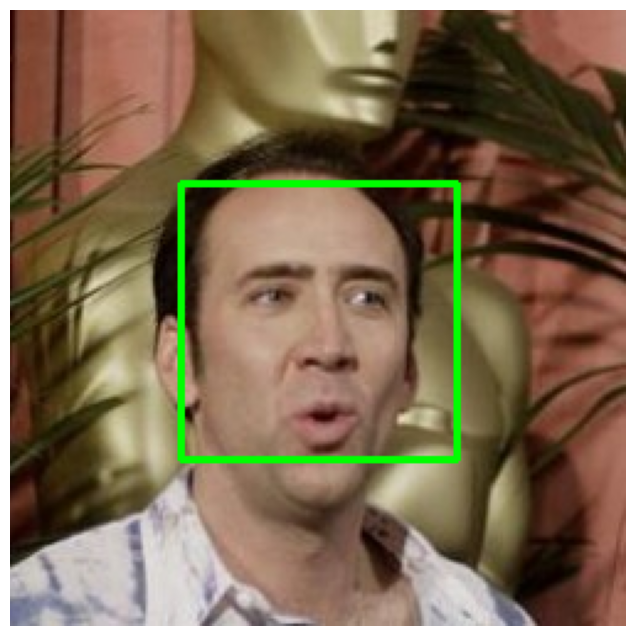

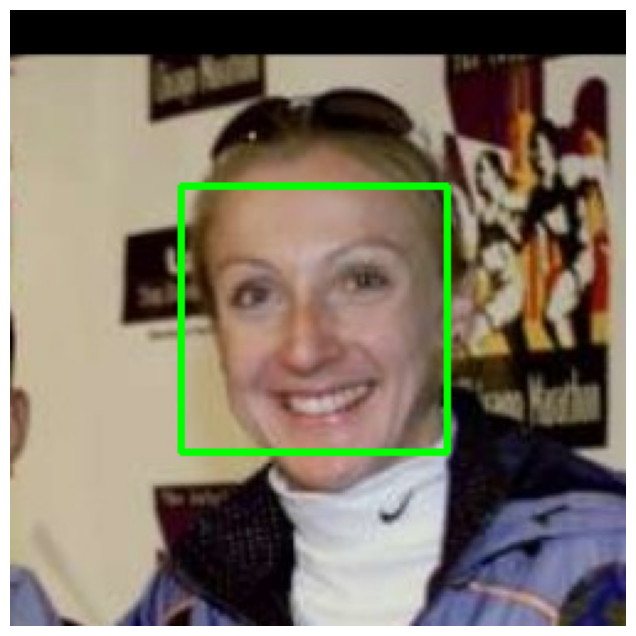

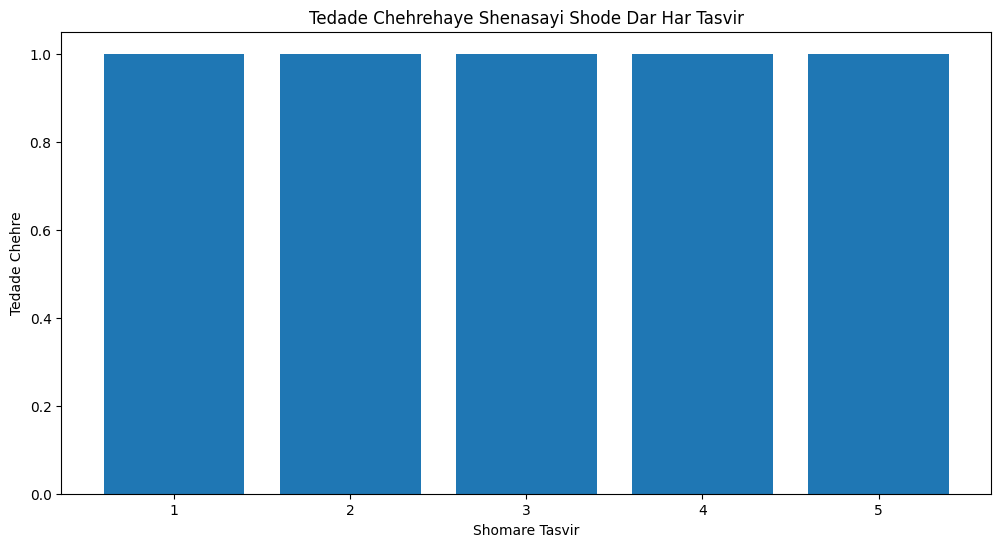

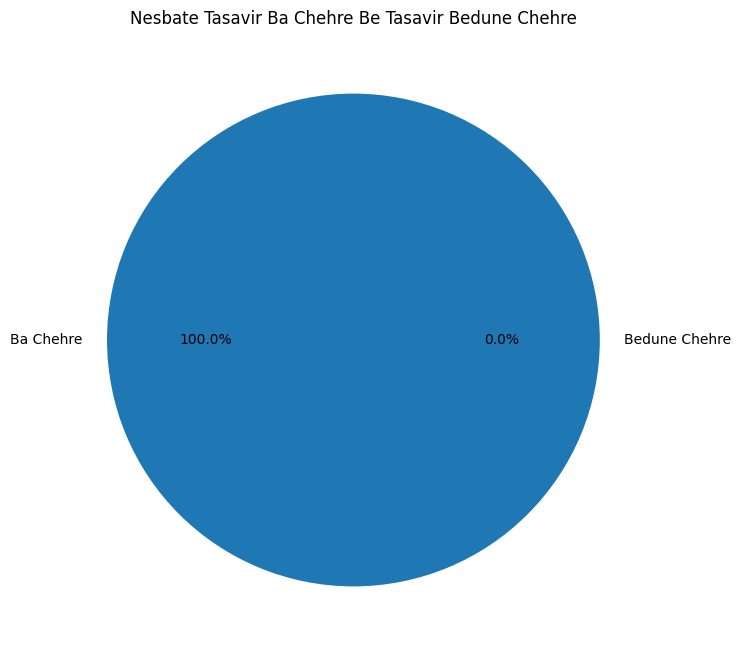

In [9]:
# سلول 5: تحلیل و نمایش نتایج کلی

tedad_kol_chehreha = sum(len(pardazesh_tasvir(tasvir)) for tasvir in sample_images)
tedad_tasavir = len(sample_images)

print(f"Tedade kol chehrehaye shenasayi shode: {tedad_kol_chehreha}")
print(f"Tedade tasavir pardazesh shode: {tedad_tasavir}")
print(f"Miangine tedade chehre dar har tasvir: {tedad_kol_chehreha / tedad_tasavir:.2f}")

# نمودار تعداد کل چهره‌ها
plt.figure(figsize=(10, 6))
plt.bar(['Chehrehaye Shenasayi Shode'], [tedad_kol_chehreha])
plt.title('Tedade Kol Chehrehaye Shenasayi Shode Dar Tasavire Nemune')
plt.ylabel('Tedad')
plt.show()

# نمودار تعداد چهره در هر تصویر
tedad_chehre_dar_tasvir = [len(pardazesh_tasvir(tasvir)) for tasvir in sample_images]
plt.figure(figsize=(12, 6))
plt.bar(range(1, tedad_tasavir + 1), tedad_chehre_dar_tasvir)
plt.title('Tedade Chehrehaye Shenasayi Shode Dar Har Tasvir')
plt.xlabel('Shomare Tasvir')
plt.ylabel('Tedade Chehre')
plt.show()

# نمودار دایره‌ای نسبت تصاویر با چهره به تصاویر بدون چهره
tasavir_ba_chehre = sum(1 for tedad in tedad_chehre_dar_tasvir if tedad > 0)
tasavir_bedun_chehre = tedad_tasavir - tasavir_ba_chehre

plt.figure(figsize=(8, 8))
plt.pie([tasavir_ba_chehre, tasavir_bedun_chehre], labels=['Ba Chehre', 'Bedune Chehre'], autopct='%1.1f%%')
plt.title('Nesbate Tasavir Ba Chehre Be Tasavir Bedune Chehre')
plt.show()

میانگین اندازه چهره: 12642.00
میانه اندازه چهره: 12544.00
انحراف معیار اندازه چهره: 646.22


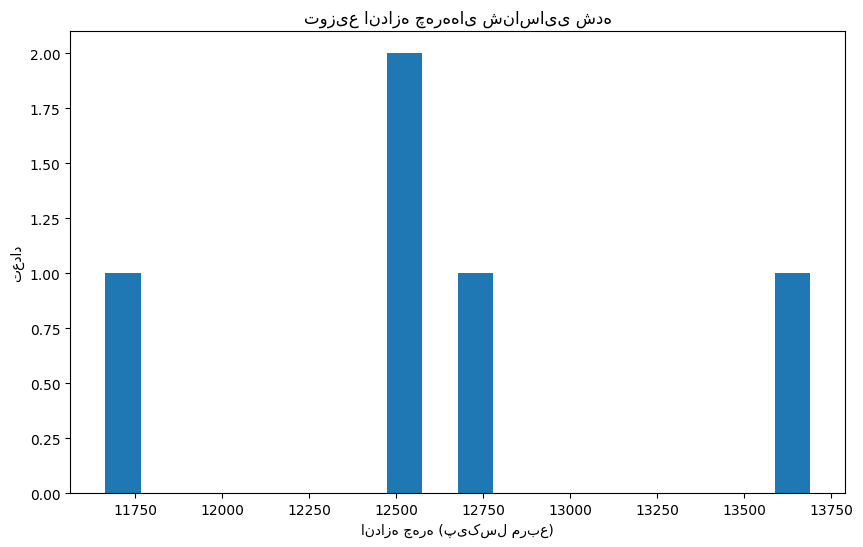

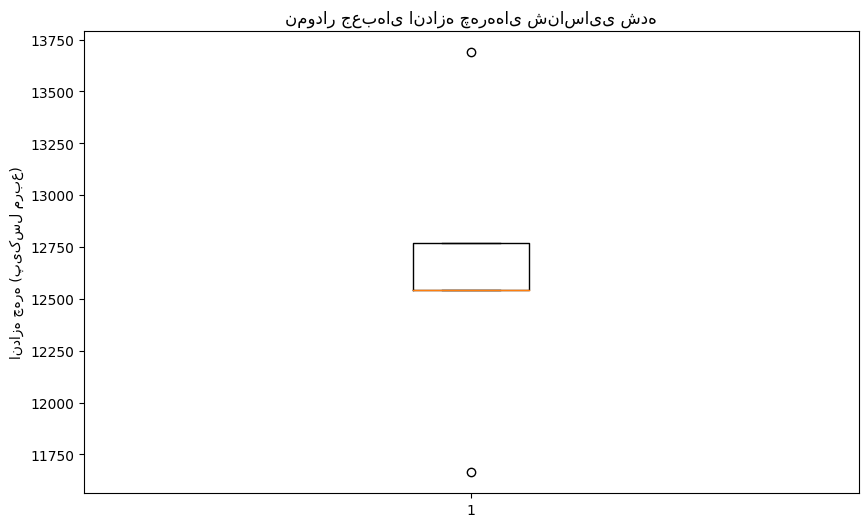

In [7]:
# سلول 6: تحلیل بیشتر چهره‌های شناسایی شده

from collections import Counter

# تابع جدید برای محاسبه اندازه چهره
def mohasebe_andaze_chehre(chehre):
    x, y, w, h = chehre
    return w * h

# لیست برای ذخیره اندازه چهره‌ها
andaze_chehreha = []

for tasvir in sample_images:
    image = cv2.imread(tasvir)
    chehreha = tashkhis_chehre(image)
    for chehre in chehreha:
        andaze = mohasebe_andaze_chehre(chehre)
        andaze_chehreha.append(andaze)

# محاسبه آمار توصیفی
miyangin_andaze = np.mean(andaze_chehreha)
miane_andaze = np.median(andaze_chehreha)
enheraf_meyar_andaze = np.std(andaze_chehreha)

print(f"میانگین اندازه چهره: {miyangin_andaze:.2f}")
print(f"میانه اندازه چهره: {miane_andaze:.2f}")
print(f"انحراف معیار اندازه چهره: {enheraf_meyar_andaze:.2f}")

# نمودار هیستوگرام اندازه چهره‌ها
plt.figure(figsize=(10, 6))
plt.hist(andaze_chehreha, bins=20)
plt.title('توزیع اندازه چهره‌های شناسایی شده')
plt.xlabel('اندازه چهره (پیکسل مربع)')
plt.ylabel('تعداد')
plt.show()

# نمودار جعبه‌ای (Box Plot) اندازه چهره‌ها
plt.figure(figsize=(10, 6))
plt.boxplot(andaze_chehreha)
plt.title('نمودار جعبه‌ای اندازه چهره‌های شناسایی شده')
plt.ylabel('اندازه چهره (پیکسل مربع)')
plt.show()